
LogisticRegression scaling in scikit-learn
==========================================

In this example we will look into the time and space complexity of
[sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)




In [1]:
%matplotlib notebook

In [2]:
from collections import OrderedDict

import numpy as np
from sklearn.linear_model import LogisticRegression
from neurtu import Benchmark, delayed


rng = np.random.RandomState(42)

n_max_samples, n_features = 50000, 100


X = rng.rand(n_max_samples, n_features)
y = rng.randint(2, size=(n_max_samples))


def benchmark_cases():
    for n_samples in np.geomspace(100, n_max_samples, 5, dtype='int'):
        for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
            tags = OrderedDict(n_samples=n_samples, solver=solver)
            model = delayed(LogisticRegression, tags=tags)(
                                solver=solver, random_state=rng)

            yield model.fit(X[:n_samples], y[:n_samples])


bench = Benchmark(wall_time=True, peak_memory=True)
df = bench(benchmark_cases())

print(df.tail())

 14%|█▍        | 7/50 [00:00<00:05,  7.46it/s]/home/rth/.miniconda3/envs/neurt-env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
100%|██████████| 50/50 [00:23<00:00,  2.12s/it]

                     peak_memory  wall_time
n_samples solver                           
49999     newton-cg    65.476562   0.550147
          lbfgs         0.000000   0.156762
          liblinear    79.796875   0.431482
          sag           0.011719   3.136239
          saga          0.000000   2.104576


We can use the pandas plotting API (that requires matplotlib) to visualize
the results,



<IPython.core.display.Javascript object>


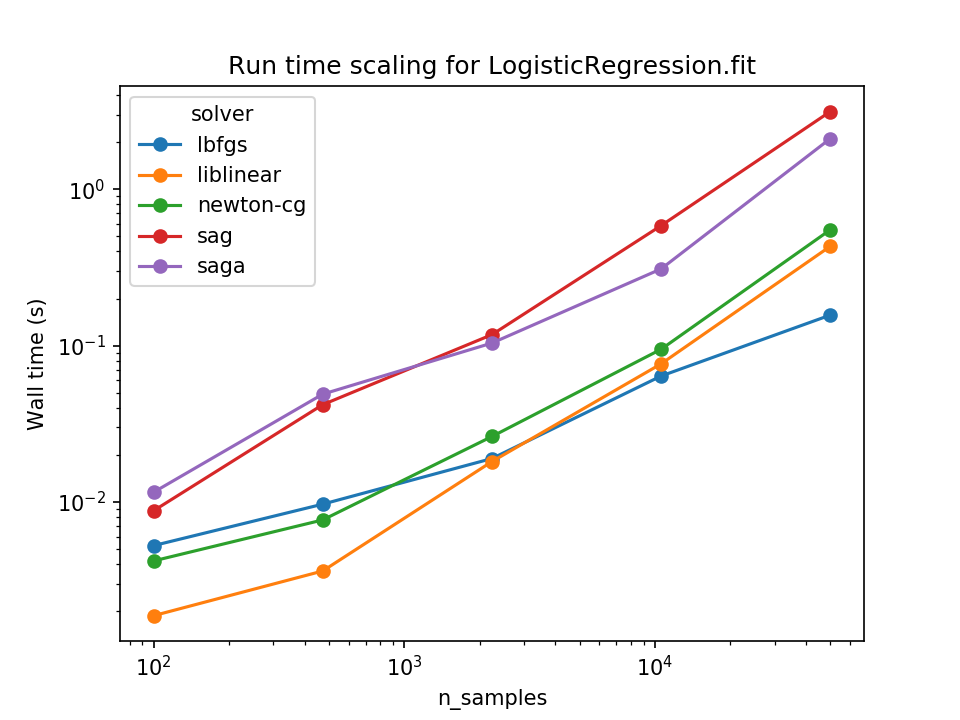

In [3]:
ax = df.wall_time.unstack().plot(marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Wall time (s)')
_ = ax.set_title('Run time scaling for LogisticRegression.fit')

The solver with the best scalability in this example is "lbfgs".

Similarly the memory scaling is represented below,



<IPython.core.display.Javascript object>


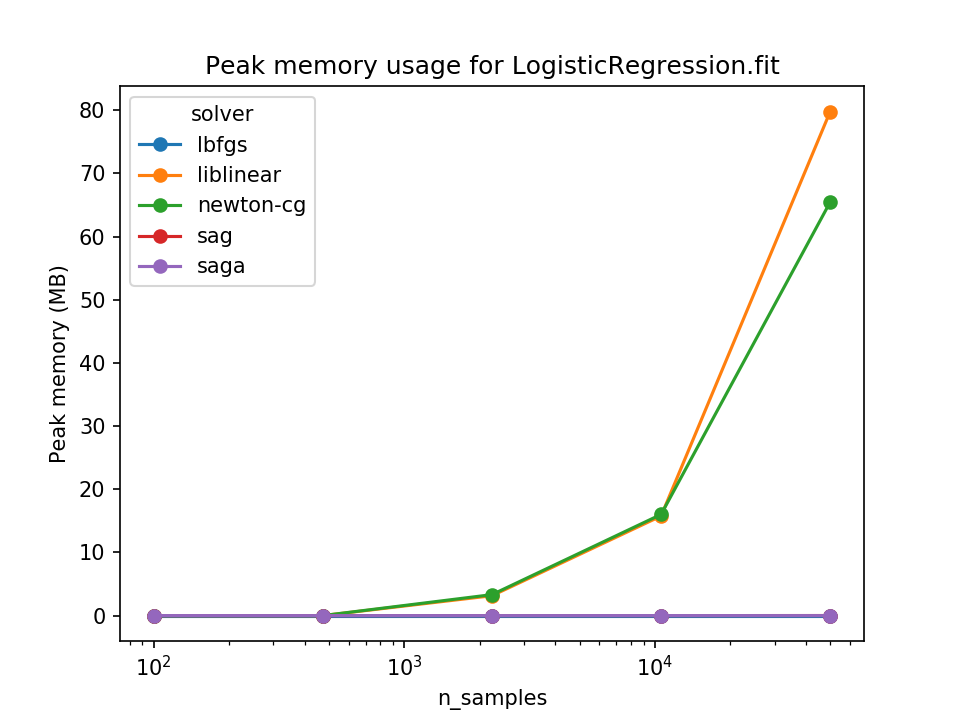

In [4]:
ax = df.peak_memory.unstack().plot(marker='o')
ax.set_xscale('log')
ax.set_ylabel('Peak memory (MB)')
_ = ax.set_title('Peak memory usage for LogisticRegression.fit')

Peak memory usage for "liblinear" and "newton-cg" appear to be significant
above 10000 samples, while the other solvers
use less memory than the detection threshold.
Note that these benchmarks do not account for the memory used by ``X`` and
``y`` arrays.

